# BioImageIT: runner or process execution

This tutorial descibe the use of the **Runner** class to run a tool. A tool runable with the **Runner** class is a command line tool descibed by a *XML* file. The structure and content of a process *XML* file is not detailled in this tutorial. Please refer to the **BioImageIT** project documentation or to the **Galaxy Project** wrapper documentation to know more about *XML* process file or wrappers.

In this tutorial, we assume that we have the process `spitfiredeconv2d` available. What we call a process here is a executable program and it associated *XML* wrapper.


## Setup the process

First you need **BioImageIT** installed in your workstation. The install depends on your backend. For a basic local install, please refere to the insall resources [here](https://bioimageit.github.io/#/install).

In the following, the files path are set supposing you are running this notebook in the default install folder of **BioImageIT**

All the **BioImageIT** API is available with a single class called ``Request``

In [1]:
import bioimageit_core.api as iit

# initialize the BioImageIT request
req = iit.Request('../config.json')
req.connect()

get service: LOCAL


To run a tool you need first to select a tool and instantiate a **Tool** object than contains all the matadata of the tool. 
As it is tedious to instantiate a **Tool** with the path of the XML file, **BioImageIT** API provides a methods that allow to access the **BioImageIT** *XML wrappers* database.

In [8]:
# get the list of all available tools
tools = req.search_tool()

# read the first tool
print(f'first tool uuid: {tools[0].id}, name: {tools[0].name}, version: {tools[0].version}')

+---------------------------+--------------------------+---------+------------+
|            UUID           |           Name           | Version |    Type    |
+---------------------------+--------------------------+---------+------------+
|      CImgDenoisingTV      |       Denoising TV       |  1.0.0  | sequential |
|       cimgdenoising       |      CImg Denoising      |  0.1.0  | sequential |
|    CImgDenoisingMedian    |     Denoising Median     |  1.0.0  | sequential |
|    CImgDenoisingNLMeans   |    Denoising NLMeans     |  1.0.0  | sequential |
|     CImgDenoisingSAFIR    |     Denoising SAFIR      |  1.0.0  | sequential |
| CImgDenoisingBayesNLmeans |  Denoising BayesNLmeans  |  1.0.0  | sequential |
|    CImgDenoisingNLBayes   |    Denoising NLBayes     |  1.0.0  | sequential |
|      CImgDenoisingDCT     |      Denoising DCT       |  1.0.0  | sequential |
|    CImgDenoisingWiener    |     Denoising Wiener     |  1.0.0  | sequential |
|      CImgDenoisingOWF     |      Denoi

A tool can be instantiate by it fullname (ie name plus version)

In [5]:
# the tool is it "name_version"
tool = req.get_tool('spitfiredeconv2d_v0.1.2')
tool.man()

SPITFIR(e) 2D : 
	              i	               	    Input Image
	          sigma	            1.5	          Sigma
	 regularization	             12	 Regularization
	      weighting	            0.6	      Weighting
	         method	             HV	         Method
	        padding	               	        Padding
	              o	               	 Denoised image


The `man()` method prints a man page that describe the tool. We now now that `spitfirevdeconv2d` needs 5 parameters: sigma, regularization, weighting, method and padding.

## Execute on files with exec()

To execute the process we simply run the method exec with the parameters descibed in the `man()` method of the process:

  Start job5 
job 5:  simglib env already exists 
job 5:  Conda exec cmd: . "/Users/sprigent/BioimageIT/miniconda3/etc/profile.d/conda.sh" && conda activate simglib && "simgspitfiredeconv2d" "-i" "./synthetic_data/data/population1_001.tif" "-o" "../workspace/population1_001_deconv.tif" "-sigma" "4" "-regularization" "12" "-weighting" "0.1" "-method" "SV" "-padding" "True" "-niter" "200" 
job 5:  spitfire2d: input image: ./synthetic_data/data/population1_001.tif 
job 5:  spitfire2d: output image: ../workspace/population1_001_deconv.tif 
job 5:  spitfire2d: method: SV 
job 5:  spitfire2d: regularization parameter: 12.000000 
job 5:  spitfire2d: weighting parameter: 0.100000 
job 5:  spitfire2d: nb iterations: 200 
job 5:  spitfire2d: use padding 
job 5:  Use 8 threads 
job 5:                                                                        | 0 % 
job 5:                                                                        | 10 % 
job 5:                                             

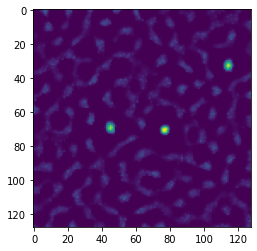

In [10]:
from skimage.io import imread
import matplotlib.pyplot as plt

# run the tool on an image
req.exec(tool,
         i='./synthetic_data/data/population1_001.tif',
         o='../workspace/population1_001_deconv.tif',
         sigma=4,
         regularization=12,
         weighting=0.1,
         method='SV',
         padding=True)

# visualize the output
out_image = imread('../workspace/population1_001_deconv.tif')
plt.figure()
plt.imshow(out_image)
plt.show()

Lets visualize the output:

This `exec()` method works on data files. This has the advantage that data are not loaded into python variables but sent directly to the external process. 

## Wrapping up

In this short tutorial, we saw the usage of **Request** and **Tool** classes to process data. Basically we need to know 3 methods
1. `req.get_tool()`: to query a tool in the tool database 
2. `tool.man()`: to get the list of the tool I/O and parameters
3. `req.exec()`: to execute the tool on files

This ``req.exec()`` method is a single data level processing and does not generate any metadata. To run a process on an experiment and have automatically generated metadata, we use the ``req.run()`` class in the next tutorial